<a href="https://colab.research.google.com/github/NihilisticMotif/Data-Science-Documentation/blob/main/Data-Science-Documentation/ML_Algorithm/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Getting Data

###[Step 1]: Import library and data set

In [1]:
!pip install --upgrade -q gspread

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 KB 1.2 MB/s eta 0:00:00


In [2]:
# import

from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import clear_output
from six.moves import urllib

from IPython.display import display, Latex

# Connect Google Collab with Google Sheet

from google.colab import auth
import gspread
from google.auth import default
from google.colab import data_table

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open('student-mat').get_worksheet(0)
rows = worksheet.get_all_values()
dfmain = pd.DataFrame(rows)

# Display Data form Google Sheet

dfmain.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
2,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
4,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15


###[Step 2]: clean data set

In [3]:
# [1.] Get string from the first row of every columns
# reference: https://www.easytweaks.com/get-first-row-pandas-dataframe/
ColumnName = dfmain.iloc[0].to_list()

# [2.] Rename every column
for i in range(len(ColumnName)):
  dfmain.rename(columns={i:ColumnName[i]},inplace=True)

# [3.] Drop first row
dfmain=dfmain.drop([0], axis=0)

# [4.] Change Data Type
# reference: https://www.geeksforgeeks.org/change-data-type-for-one-or-more-columns-in-pandas-dataframe/
# reference: https://statisticsglobe.com/convert-string-boolean-pandas-dataframe-column-python
# reference: https://sparkbyexamples.com/pandas/pandas-convert-column-to-numpy-array/
# reference: https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html
# reference: https://stackoverflow.com/questions/2468334/creating-dynamic-and-expandable-dictionaries-in-python
# reference: https://favtutor.com/blogs/merge-dictionaries-python
# reference: https://datagy.io/python-int-to-binary/

# Change the data type of every column in dfmain
for i in range(len(ColumnName)):
  IsD=np.array(dfmain[ColumnName[i]])[0]
  if IsD.isdigit():
    # Change data type from String into Integer
    dfmain[ColumnName[i]]=dfmain[ColumnName[i]].apply(pd.to_numeric)
  else:
    continue
    dfmain[ColumnName[i]] = dfmain[ColumnName[i]].map(dict(Convert['data'][-1]))

In [4]:
# [5.] Select only columns with numetric data type because in most case, linear regression is not work well with boolean data type
# and we want to demonstrate how linear regression with multiple features works.
# reference: https://stackoverflow.com/questions/33957720/how-to-convert-column-with-dtype-as-object-to-string-in-pandas-dataframe

ColumnType=dfmain.dtypes.astype('|S8') 
ColumnInt=[]
ColumnNot=[]

for i in range(len(ColumnName)):
  if str(ColumnType[i])=="b'int64'":
    ColumnInt.append(ColumnName[i])
  else:
    ColumnNot.append(ColumnName[i])

# [6.A] Select only 2 column, which are the single-feature input column and the out put column, in order to demonstrate
# 1 feature
ColAll=ColumnInt
ColX1f=[ColumnInt[-2]]
ColY1f=[ColumnInt[-1]]
df1f=dfmain.loc[:, dfmain.columns.intersection([ColX1f[0],ColY1f[0]])]

# [6.A] Select every only columns with numetric data.
# multiple features
dfmf=dfmain.drop(columns=ColumnNot)

ColXmf=[]

ColXmf=[]
for i in range(len(ColAll)):
  if ColAll[i] not in ColY1f:
    ColXmf.append(ColAll[i])

###[Step 3]: separate training data set from evaluating data set

In [5]:
# Separate training and evaluating data in order to evaluate how well the algorithm predict data out side its data set.

def SeparateData(data,Ratio,nameY):

  DataRatio = int(data.shape[0]*Ratio)
  Data=data.sample(frac = 1)
  TrainD= Data.iloc[:DataRatio]
  TesttD= Data.iloc[DataRatio:]

  TrainX=TrainD.drop(nameY, axis=1)
  TrainY=TrainD[nameY]
  TesttX=TesttD.drop(nameY, axis=1)
  TesttY=TesttD[nameY]

  #print('TrainX')
  #print(TrainX)
  #print('TesttX')
  #print(TesttX)

  return [TrainX,TrainY,TesttX,TesttY]

# df = data frame
# Col = Column
# X = input
# Y = Output
# Te = evaluating data
# Tr = training data
# 1f = for single feature linear regression
# mf = for multiple features linear regression

DaD1f=SeparateData(df1f,0.75,ColY1f)
TrX1f=DaD1f[0]
TrY1f=DaD1f[1]
TeX1f=DaD1f[2]
TeY1f=DaD1f[3]

'''
TrX=TrX1f
TrY=TrY1f
TeX=TeX1f
TeX=TeY1f
'''

DaDmf=SeparateData(dfmf,0.75,ColY1f)
TrXmf=DaDmf[0]
TrYmf=DaDmf[1]
TeXmf=DaDmf[2]
TeYmf=DaDmf[3]

#Linear Regression

###What is Linear Regression

In statistics, linear regression is a linear approach for modelling the relationship between multiple variables. This tutorial demonstrate the simplest linear regression model.

The data of this tutorial contains column X (X_Grade) and Y (Y_Grade).

In order to perform linear regression, it is important to do 5 steps
1. Initializing Variable (Hypothesis function)
2. Creating Evaluating Function (Square Error function)
3. Creating Optimizing Evaluating Function (Gradient Descent function)
4. Evaluate the accuracy of the algorithm

Here is the source of this data: https://youtu.be/BOhgGA7Eu5E

###[Step 1]: Initializing Variable
* $h(x)=\vec{h}\cdot\vec{x}+h_0$

**Reference**
* https://www.coursera.org/learn/machine-learning-course/lecture/db3jS/model-representation


In [6]:
ColX=ColX1f[0]
ColY=ColY1f[0]
df=df1f
TrX=TrX1f
TrY=TrY1f
TeX=TeX1f
TeY=TeY1f

Linear regression is a machine learning model which is used for predicting the relationship between value x and value y, based on the given data on the graph.In this case, the linear regression is displayed as

 $h_0 + x_1*h1$

* $h(x)$ = hypothesis function

The goal is to measure and optimize the accuracy of $h()$ function.

List of initial Variable
* $x_i$ = input No.i = feature No.i
* $y_i$ = output No.i = label No.i
* $m$ = number of all training examples 
* $(x_i, y_i)$ = training example 
* $(x_i, y_i){i=1,...,m}$ = training set
* space = set = array = vector = matrix = tensor = list (*** There is a minor * difference between those terms.)
* $X$ = set of input values
* $Y$ = set of output values
* $h(x)$ = hypothesis function = $x^0h_0 + x^1 h_1 + x^2h_2 +... + x^nh_n=\vec{x}\cdot\vec{h}+h_0$
* $h_{i}$ = constant of hypothesis function No.i


Here is the graph based on the data.

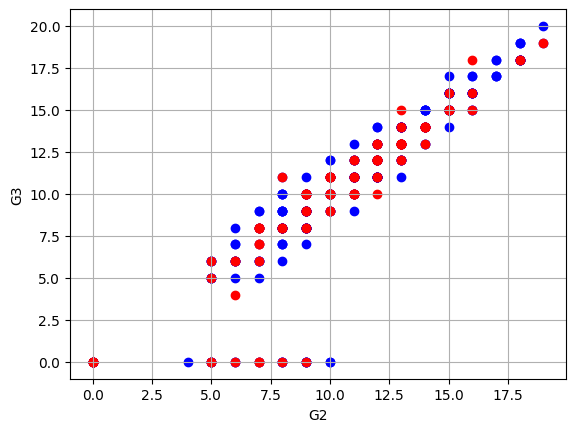

In [7]:
# How do I enforce a square grid in matplotlib? reference: https://stackoverflow.com/questions/50158333/how-do-i-enforce-a-square-grid-in-matplotlib
plt.grid()

# Add labels to the x- and y-axis.
plt.xlabel(ColX)
plt.ylabel(ColY)

# Data is plotted.
plt.scatter(TrX,TrY,color = 'blue')
plt.scatter(TeX,TeY,color = 'red')

###[Step 2]: Creating Evaluating Function (a.k.a. Cost Function or Squared error function))

* $J(h_{0},h_{1})=\frac{1}{2m}\sum_{i=1}^m(h(x_i)-y_i)^2$

**Accuracy of hypothesis function**

$J(h_{0},h_{1})=\frac{1}{2m}\sum_{i=1}^m(h(x_i)-y_i)^2$

* error = $h(x_i) - y_i$
* $m$ = number of all training example.

Q: Why $\frac{1}{2m}$ ?

Q: Why do we have to divide by 2 in the ML squared error cost function?

A: It is because when you take the derivative of the cost function, that is used in updating the parameters during gradient descent, that 2 in the power get canceled with the 1/2 multiplier, thus the derivation is cleaner. (https://datascience.stackexchange.com/questions/52157/why-do-we-have-to-divide-by-2-in-the-ml-squared-error-cost-function)


Q: Why $(...)^2$  ? 

Q: Why is a square mean error used instead of taking its absolute value? Both are removed negatives, but why is the mean squared error so widely used?

A: By squaring the errors we are ignoring the effect of sign $(+ -)$.
The contribution of larger errors to the sum of errors becomes more compared to small errors.
(https://www.quora.com/Why-is-a-square-mean-error-used-instead-of-taking-its-absolute-value-Both-are-removed-negatives-but-why-is-the-mean-squared-error-so-widely-used)


**Here is 3D visualization of Squared Error function**

Text(0.5, 0, 'SquareError')

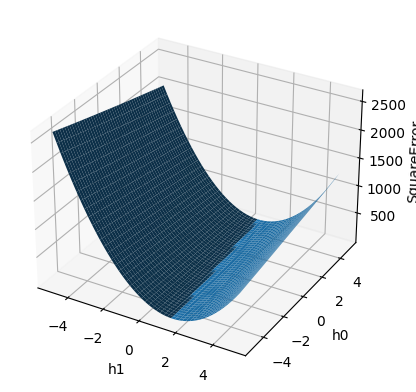

In [8]:
# import graph library
#import math
from mpl_toolkits import mplot3d
from matplotlib.pyplot import figure

def LineR_Evaluation_1f(data,m,c):
    # size of training data = dfM.shape[0]
    # x_i = dfM.iat[i,0]
    # y_i = dfM.iat[i,1]
    sigma =0
    for i in range(data.shape[0]):
      sigma +=pow((data.iat[i,0]*m+c-data.iat[i,1]),2)
    return (1/(2*data.shape[0]))*sigma

N = 50
M = 50

x_values = np.linspace(-5, 5, N)
y_values = np.linspace(-5, 5, M)
X, Y = np.meshgrid(x_values, y_values)
Z = LineR_Evaluation_1f(df,X, Y)

# Plotting 3D Data.
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z);

ax.set_xlabel('h1')
ax.set_ylabel('h0')
ax.set_zlabel('SquareError')
#ax.view_init(0, 90);
# reference: https://youtu.be/gqoLLGgbeAE

# other related information: https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy

**Note**
1. Vector is 1 rank Tensor. $\implies$ Vector.shape() = (m, 1)
2. Matrix is 2 rank Tensor. $\implies$ Matrix.shape() = (m, n)

###[Step 3.A]: Creating Optimizing Evaluating Function with Gradient Descent

* $h_{i} := h_{i}-a*J'(h_{i})$

Gradient Descent is used for optimize Square Error Function.

$h_{i} := h_{i}-a*J'(h_{i})$

$h_{0} := h_{0}-a*J'(h_{0})$

$h_{1}:=h_{1}-a*J'(h_{1})$

accuracy of hypothesis function = $J(h_{i})$

slope of of accuracy = changing rate of accuracy = $J'(h_{i})$

$a$ = learning rate
* In order for Gradient Descent to work, we must set the learning rate to an appropriate value. This parameter determines how fast or slow we will move towards the optimal weights. If the learning rate is very large we will skip the optimal solution. (https://towardsdatascience.com/https-medium-com-dashingaditya-rakhecha-understanding-learning-rate-dd5da26bb6de)

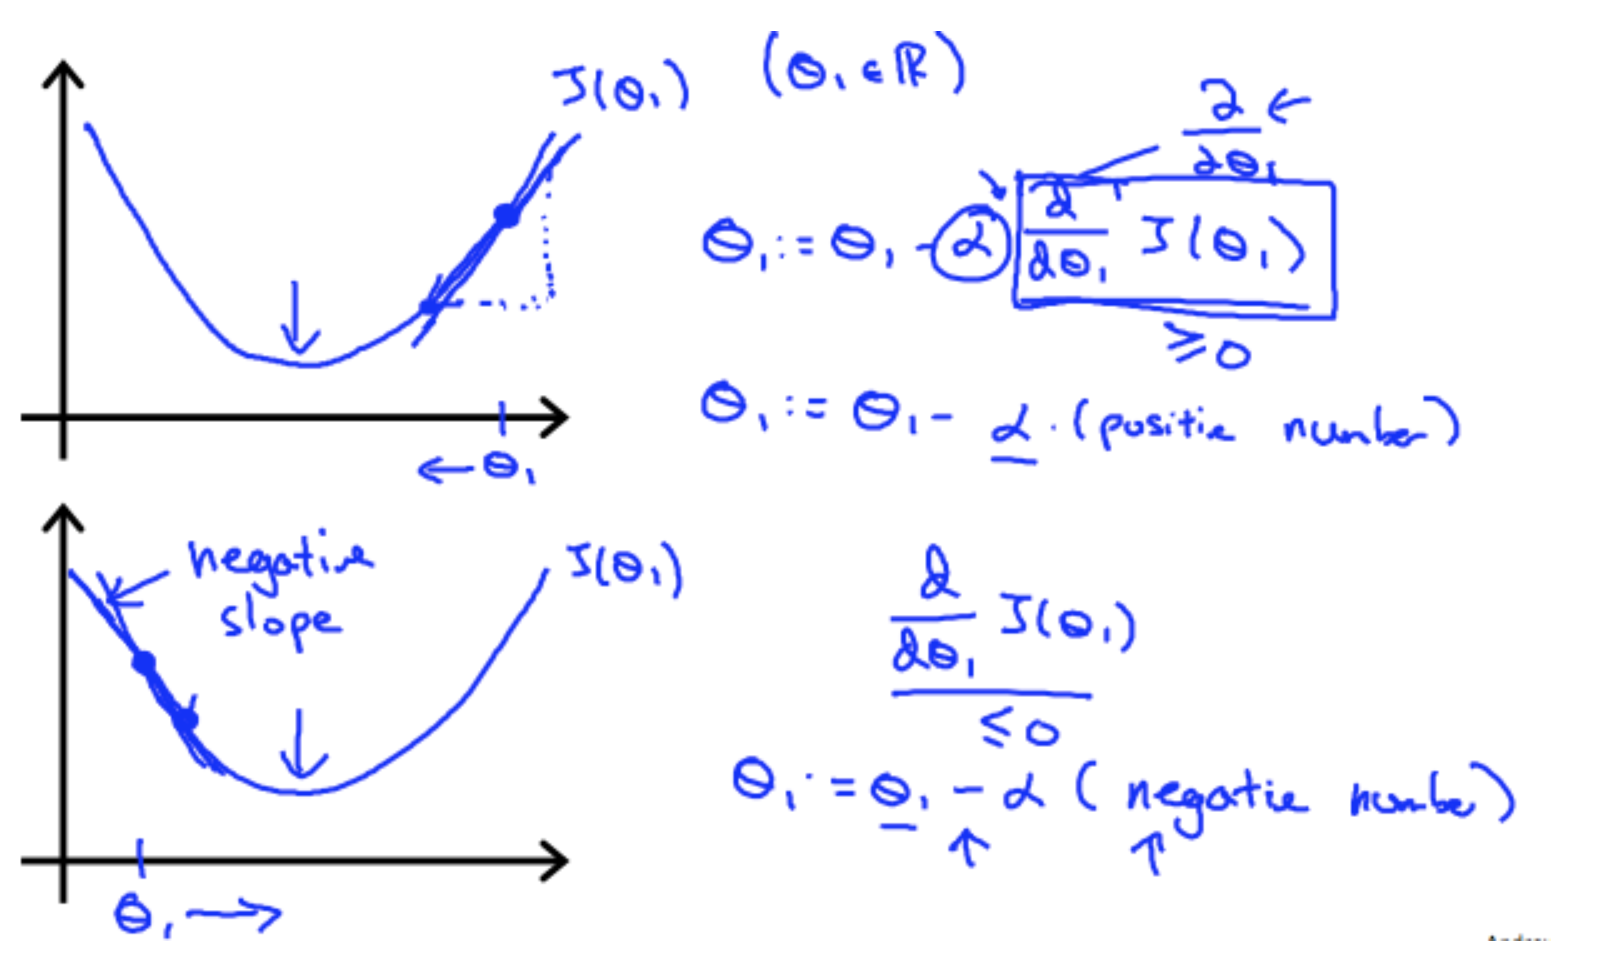

Q: Why $-a*J'(h_{i})$?

A: 

When value of $h_{i} < $ minimum point $J'(h_{i})<0 \implies -a*J'(h_{i})>0$

$\therefore h_{i}:=h_{i}-a*J'(h_{i})$ increase the value of $h_{i}$ to equal to minimum error point.

When value of $h_{i} > $ minimum point $J'(h_{i})>0 \implies -a*J'(h_{i})<0$

$\therefore h_{i}:=h_{i}-a*J'(h_{i})$ decrease the value of $h_i$ to equal to minimum error point.

**Find $\frac{\partial}{\partial h_j}J(\vec{h})$**

$\frac{\partial}{\partial h_j}J(\vec{h})=\frac{\partial}{\partial h_j}[\frac{1}{2m}\sum_{i=1}^m(h(\vec{x_j})-y_i)^2]$

According to constant multiple, $\frac{d}{dx}[k*f(x)] = k*\frac{d}{dx}f(x)$

$\frac{\partial}{\partial h_j}J(\vec{h})=\frac{1}{2m}\frac{\partial}{\partial h_j}[\sum_{i=1}^m(h(\vec{x_j})-y_i)^2]$

$\frac{\partial}{\partial h_j}J(\vec{h})=\frac{1}{2m}\frac{\partial}{\partial h_j}[\sum_{i=1}^m(h_jx_{ij}+c-y_i)^2]\{h(\vec{x_j})=h_jx_{ij}+c,c\in\mathbb{R}\}$


According to Chain Rule: $\frac{d}{dx}[f(g(x))] = (f\circ g)'= f'(g(x))*g'(x)$

Given that:
* $f(x)=\sum x^2\implies f'(x)=\sum2x$
* $g(x)=\sum h_jx_j+c-y_i\implies g'(x)=\sum x_j$

$\frac{\partial}{\partial h_j}J(\vec{h})=\frac{1}{2m}[\sum_{i=1}^m2(h(\vec{x_j})-y_i)*x_j]$

$\frac{\partial}{\partial h_j}J(\vec{h})=\frac{1}{m}[\sum_{i=1}^m(h(\vec{x_j})-y_i)*x_j]$

**Keyword**
* Epoch = a single full iteration of the algorithm over the training data. (https://medium.com/@niitwork0921/what-is-epoch-in-machine-learning-1062064d42d6)

**My linear regression implementation**

In [9]:
'''
def LineR_Evaluation_1f(data,Vector):
  sigma =0
  for i in range(data.shape[0]):
    sigma +=pow((data[0]*Vector[1]+Vector[0]-data[1]),2)
  return (1/(2*data.shape[0]))*sigma
'''

def LineR_DiffEvaluation_1f(dX,dY,Vector):
  res = Vector[1] * dX + Vector[0] - dY
  return [res.mean(),(res*dX).mean()]
  # reference: https://mccormickml.com/2014/03/04/gradient-descent-derivation/

def GradientDescent_1f(dX,dY,Diff,LRate=0.008,Decay=0.00002,InitialVector=[0.5,0.5],LastEpoch=10000, AcceptError=1e-10):
  epoch=0
  Vector=np.array(InitialVector)
  while epoch<LastEpoch or np.all(np.abs(Diff(dX.values.reshape(-1),dY.values.reshape(-1),Vector))<=AcceptError):
    #print(Vector)
    '''
    print('#################### data')
    print(data)
    print('#################### np.array(Diff(data,Vector))')
    print(np.array(Diff(data,Vector)))
    print('#################### Vector')
    print(Vector)'''
    Vector-=LRate*pow((1-Decay),epoch)*np.array(Diff(dX.values.reshape(-1),dY.values.reshape(-1),Vector))
    # Slowly decrease learning rate.
    # reference: https://www.thoughtco.com/exponential-decay-definition-2312215
    epoch+=1
  return list(Vector)

'''
# Here is the previous version of `gradient_descent` implementation from https://realpython.com/gradient-descent-algorithm-python/#basic-gradient-descent-algorithm
# `GradientDescent` is faster than `gradient_descent`, because the learning_rate is decrease when the h_vector approach the accurate (global minimum) value.

def gradient_descent(
    gradient, start, learn_rate, n_iter=50, tolerance=1e-06
):
    vector = start
    # h_i = initial vector
    for _ in range(n_iter):
        diff = -learn_rate * gradient(vector)
        # diff = -a*J'(h_i)
        if np.all(np.abs(diff) <= tolerance):
            # if |a*J'(h_i)|==very_small_inaccuracy: stop
            break
        vector += diff
        # h_i=h_i-a*J'(x)
    return vector
    # reference: https://realpython.com/gradient-descent-algorithm-python/#basic-gradient-descent-algorithm
'''

H1f=GradientDescent_1f(
    TrX, TrY,LineR_DiffEvaluation_1f
)
print(H1f)

[-1.3985467619606071, 1.1032023331634884]


###[Step 3.B]: Implement linear regression with other Python library

**Linear regression implementation with SKLearn library**


In [10]:
from sklearn.linear_model import LinearRegression
skRL = LinearRegression()
skRL.fit(TrX, TrY)
print(skRL.intercept_)
print(skRL.coef_[0])

[-1.3995909]
[1.10328844]


**Numpy**

In [11]:
npRL = np.polyfit(TrX.values.reshape(-1), TrY, 1)
print(npRL)

[[ 1.10328844]
 [-1.3995909 ]]


###[Step 4.A]: Evaluate the accuracy of the algorithm by plotting graph

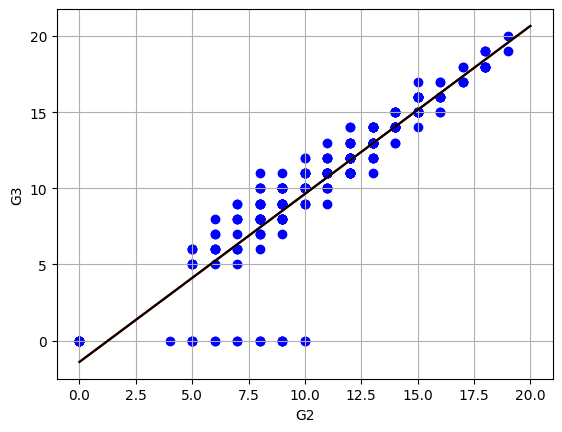

In [13]:
# Here is the data.
# How do I enforce a square grid in matplotlib? reference: https://stackoverflow.com/questions/50158333/how-do-i-enforce-a-square-grid-in-matplotlib
plt.grid()

# Add labels to the x- and y-axis.
plt.xlabel(ColX)
plt.ylabel(ColY)

# Data is plotted.
plt.scatter(TrX,TrY,color = 'blue')
#plt.scatter(TeX,TeY,color = 'red')

# Here is the hypothesis function a.k.a. prediction function.
xpoints = np.array([0, 20])
ypoints = xpoints*H1f[1]+H1f[0]

plt.plot(xpoints, xpoints*H1f[1]+H1f[0],color='green')
plt.plot(xpoints, xpoints*skRL.coef_[0]+skRL.intercept_,color='red')
plt.plot(xpoints, xpoints*npRL[0]+npRL[1],color='black')
plt.show()

**Note**

* It is note worthly that the line of $h(x)$ function follow the trend od the data, which means that $h(x)$ have high accuracy. Beside plotting graph, there are other various method.

###[Step 4.B]: Evaluate the accuracy of the algorithm by $J(h_{0},h_{1})=\frac{1}{2m}\sum_{i=1}^m(h(x_i)-y_i)^2$

* error = $h(x_i) - y_i$

In [27]:
def LineR_Evaluation_1f(TestX,TestY,Coef,Inte):
  sum=0
  for i in range(TestX.shape[0]):
    sum+=pow(float(TestX.iloc[i])*Coef+Inte-float(TestY.iloc[i]),2)
  sum=sum/(2*TestX.shape[0])
  return sum

print(LineR_Evaluation_1f(TeX,TeY,H1f[1],H1f[0]))
print(LineR_Evaluation_1f(TeX,TeY,skRL.coef_[0][0],skRL.intercept_[0]))
print(LineR_Evaluation_1f(TeX,TeY,npRL[0][0],npRL[1][0]))

1.8427464484499427
1.8427492841233486
1.8427492841233486


###[Step 4.C]: Evaluate the accuracy of the algorithm by $R^2$

* $R^2(y,h(x_{i}))=1-\frac{\Sigma_{i=1}^n(y_i-h(x_{i}))^2}{\Sigma_{i=1}^n(y_i-y_m)^2}\in[0,1]$

**What is $R^2$?**

$R^2$ indicates how well the data fit the regression model (the goodness of fit). ($R^2$ have the similar purpose to Square Error Function, $J(h)$)

**Note that**
* Large $R^2$ does not guarantee good prediction. It is simply a measure of how well the model explains the variability in the observed data

**This is Square Error Function**
* $J(h_{0},h_{1})$ =$\frac{1}{2m}\sum_{i=1}^m(h(x_i)-y_i)^2$

**This is $R^2$**
* $R^2(y,h(x_{i}))=1-\frac{\Sigma_{i=1}^n(y_i-h(x_{i}))^2}{\Sigma_{i=1}^n(y_i-y_m)^2}\in[0,1]$
* $y_m=\frac{1}{m}*\sum_{i=1}^my_i$

**Why $R^2(y,h(x_{i}))=1-\frac{\Sigma_{i=1}^n(y_i-h(x_{i}))^2}{\Sigma_{i=1}^n(y_i-y_m)^2}\in[0,1]$?**

**Why $\Sigma_{i=1}^n(y_i-h(x_{i}))^2$?**
* $\Sigma_{i=1}^n(y_i-h(x_{i}))^2=\Delta(y-h(x))^2$
* $\Sigma_{i=1}^n(y_i-h(x_{i}))^2=2m*J(h_0,h_1)=\sum_{i=1}^m(h(x_i)-y_i)^2$
* $\frac{1}{2m}$ is not useful because $R^2$ have nothing to do with derivative and gradient descent. Moreover $\frac{1}{2m}$ not suit with $R^2\in[0,1]$

**Why $\Sigma_{i=1}^n(y_i-y_m)^2$?**
* $\Sigma_{i=1}^n(y_i-y_m)^2=\Delta(y-y_m)^2$ indicates different between accual y-axis value and its average value.

**Prove that $0\leq R^2(y,h(x_{i}))=\frac{\Sigma_{i=1}^n(y_i-h(x_{i}))^2}{\Sigma_{i=1}^n(y_i-y_m)^2}\leq1$?**

**Why $1-r^2$?**

* Convert minimized error value into accura

reference:
* https://stats.stackexchange.com/questions/469654/why-must-the-r-squared-value-of-a-regression-be-less-than-1
* https://towardsdatascience.com/an-ode-to-r-squared-804d8d0ed22c
* https://youtu.be/bMccdk8EdGo

**MSE $(J(\vec{h_n},h^{\{0\}}))$ or R-Squared $(R^2)$ – Which one to Use?**

* It is recommended to use R-Squared because disadvantage of using MSE than R-squared is that it will be difficult to gauge the performance of the model using MSE as the value of MSE can vary from 0 to any larger number. On the other hand, in the case of R-squared, the value is bounded between 0 and 1. A value of R-squared closer to 1 would mean that the regression model covers most part of the variance of the values of the response variable and can be termed as a good model. 

* reference: https://vitalflux.com/mean-square-error-r-squared-which-one-to-use/

**My $R^2$ implementation**

In [ ]:
def FindR2(TestX,TestY,Coef_Vect,Inte_Cons):
    # size of training data = dfM.shape[0]
    # x_i = dfM.iat[i,0]
    # y_i = dfM.iat[i,1]
    SumH =0
    for i in range(TestX.shape[0]):
      SumH +=pow((np.dot(np.array(TestX.iloc[i]),np.array(Coef_Vect))+Inte_Cons-TestY.iat[i,0]),2)
    SumY =0

    TestYm=TestY.mean()
    for i in range(TestX.shape[0]):
      SumY +=pow((TestYm-TestY.iat[i,0]),2)
    return SumH/SumY

R2_0=FindR2(TeX,TeY,[H1f[1]],H1f[0])
R2_1=FindR2(TeX,TeY,skRL.coef_,skRL.intercept_)
R2_2=FindR2(TeX,TeY,[npRL[0]],npRL[1])
print('MyCode')
print(1-R2_0)
print('SKLearn')
print(1-R2_1) 
print('Numpy')
print(1-R2_2) 

MyCode
G3    0.818932
dtype: float64
SKLearn
G3    0.818925
dtype: float64
Numpy
G3    0.818925
dtype: float64


**$R^2$ implementation with SKLearn**

In [ ]:
from sklearn.metrics import r2_score

R2_0=r2_score(TeY,TeX*H1f[1]+H1f[0])
R2_1=r2_score(TeY,TeX*skRL.coef_[0]+skRL.intercept_)
R2_2=r2_score(TeY,TeX*npRL[0]+npRL[1])

print('MyCode')
print(R2_0)
print('SKLearn')
print(R2_1) 
print('Numpy')
print(R2_2) 

MyCode
0.8189318923024611
SKLearn
0.8189254540498498
Numpy
0.8189254540498497


#Linear Regression with multiple features

###Linear Algebra Notation

**Linear algebra notation**

**Vector Space**

Vector Space = a space comprised of vectors, collectively with the associative and commutative law of addition of vectors and also the associative and distributive process of multiplication of vectors by scalars is called vector space. (https://byjus.com/maths/vector-space/)
1. $\vec{a_m}+\vec{b_m}=\vec{b_m}+\vec{a_m}\in\mathbb{R^m}$
2. $c\vec{v_m}=\vec{v_m}c\in\mathbb{R^m}$

**Vector Space Notation**

* $a\in\mathbb{R}$
* $\vec{a}_m\in\mathbb{R^m}$
* $A_{m\times n}\in\mathbb{R^{m\times n}}$
* $1_{m\times n}\in\mathbb{R^{m\times n}}=$ matrix that have only $1$ as its elements.
* $a^{\{n\}}=a$ no. $n$ which is $\in\mathbb{R}$
* $\vec{a}_m^{\{n\}}=$ vector $a$ no. $n$ which is $\in\mathbb{R^m}$
* $a^n=\Pi_{i=1}^n a$
* $\vec{a}_m^n=\Pi_{i=1}^n\vec{a}_m$

**Transpose**
* $A_{m\times n}\implies A^T_{n\times m}$

**Dot product**

* $\vec{a_n}\cdot\vec{b_n}=\sum_{i=1}^na^{\{i\}}b^{\{i\}}$

**Matrix Multiplication**

$R_{n\times m}\cdot C_{m\times q}=P_{n\times q}$

$\vec{r_m}^{\{i\leq n\}}\cdot\vec{c_m}^{\{j\leq q\}}=p^{\{i\leq n, j\leq q\}}$

* $\vec{r_m}^{\{i\leq n\}}=$ row vector of matrix $R_{n\times m}$ no.$i$
* $\vec{c_m}^{\{j\leq q\}}=$ column vector of matrix $C_{m\times q}$ no.$j$
* $i,j\in\mathbb{Z}$
* $i\in[1,n]$
* $j\in[1,p]$

reference: https://www.mathsisfun.com/algebra/matrix-multiplying.html

###Introduction of multivariate linear regression and summary of linear regression

* Linear regression with multiple variables is also known as "multivariate linear regression".

**Hypothesis function**

$h(x)=h^{\{0\}}+h^{\{1\}}*x^{\{1\}}+h^{\{2\}}*x^{\{2\}}+...+h^{\{n\}}*x^{\{n\}}$

$h(x)=\vec{h}_n\cdot\vec{x}_n+h^{\{0\}}_1$

$h_m(X_{m\times n})=X_{m\times n}\cdot\vec{h_n}+\vec{h^{\{0\}}_m}$

* $\vec{x}_n=$ input
* $\vec{h}_n=$ coefficient
* $h^{\{0\}}_m=$ intercept
* $n=$ number of all feature
* $m=$ number of all row in the data frame.

**Evaluating Function (Square Error function.)**

$J(h^{\{0\}}_1,\vec{h_n})=\frac{1}{2m}\sum_{i=1}^m(h(\vec{x_n}^{\{i\}})-y_i)^2$

$J_1(h^{\{0\}}_m,\vec{h_n})=\frac{1}{2m}(X_{m\times n}\cdot\vec{h_n}+h^{\{0\}}_m-\vec{y_m})^2$

* $\vec{y_m}=$ output

**Gradient Descent of linear regression**

$h^{\{i\}} := h^{\{i\}}-a*\frac{\partial}{\partial h^{\{i\}}}J(h^{\{i\}})$

$h^{\{i\}} := h^{\{i\}}-a*\frac{1}{m}*\Sigma_{j=1}^m(h(\vec{x_n}^{\{j\}}))-y^{\{j\}})*x^{\{i\}})$

$\vec{h_n} := \vec{h_n}-\frac{a}{m}X^T_{n\times m}\cdot (X_{m\times n}\cdot \vec{h_n}+\vec{h_m}^{\{0\}}-\vec{y_m})$

**Gradient Descent of linear regression for $h^{\{0\}}$**

$h^{\{0\}} := h^{\{0\}}-\frac{a}{m}\vec{1}_m\cdot(X_{m\times n}\cdot \vec{h_n}+\vec{h_m}^{\{0\}}-\vec{y_m})$

**What is $R^2$?**

* $R^2$ indicates how well the data fit the regression model (the goodness of fit). ($R^2$ have the similar purpose to Square Error Function, $J(h)$)

**R square: $R^2$**

$R^2(y,h(x^{\{i\}}))=1-\frac{\Sigma_{i=1}^n(y^{\{i\}}-h(x^{\{i\}}))^2}{\Sigma_{i=1}^n(y^{\{i\}}-y^{\{m\}})^2}\in[0,1],y^{\{m\}}=\frac{1}{m}\sum_{i=1}^my^{\{i\}}$

$R^2(\vec{y}_m,h_m(X_{m\times n}))=1-\frac{((X_{m\times n}\cdot \vec{h_n}+\vec{h_m}^{\{0\}}-\vec{y_m})^2}{((\frac{1}{m}\cdot\vec{y}_m\cdot\vec{1}_m)\cdot\vec{1}_m-\vec{y}_m)^2}=1-(X_{m\times n}\cdot \vec{h_n}+\vec{h_m}^{\{0\}}-\vec{y_m})^2(((\frac{1}{m}\cdot\vec{y}_m\cdot\vec{1}_m)\cdot\vec{1}_m-\vec{y}_m)^2)^{-1}$

$R^2(\vec{y}_m,h_m(X_{m\times n}))=1-\frac{J^{\{H\}}}{J^{\{Y\}}}$

**What does it means when $R^2<0$?**

$R^2=1-\frac{J^{\{H\}}}{J^{\{Y\}}}$


* The fit of the model ($J^{\{H\}}$) is worse than the fit of a horizontal line ($J^{\{Y\}}$). Thus the sum-of-squares from the model is larger than the sum-of-squares from the horizontal line.

reference: https://stats.stackexchange.com/questions/12900/when-is-r-squared-negative

###[Step 1]: Initialize the variable

In [28]:
ColXi=-1
ColX=ColXmf[ColXi]
ColY=ColY1f[0]
df=dfmf
TrX=TrXmf
TrY=TrYmf
TeX=TeXmf
TeY=TeYmf

In [29]:
print(TrX.shape)
print(TrY.shape)

(296, 15)
(296, 1)


###[Step 2]: Train the machine learning model with **Gradient Descent of linear regression**

* $\vec{h_n} := \vec{h_n}-\frac{a}{m}X^T_{n\times m}\cdot (X_{m\times n}\cdot \vec{h_n}+\vec{h_m}^{\{0\}}-\vec{y_m})$
* $h^{\{0\}} := h^{\{0\}}-\frac{a}{m}\vec{1}_m\cdot(X_{m\times n}\cdot \vec{h_n}+\vec{h_m}^{\{0\}}-\vec{y_m})$

**My Implementation**

In [30]:
def LineR_DiffEvaluation(dX,dY,Coef,Inte):
  '''print(np.dot(
        dX,
        Coef).shape)
  print(np.full(
        (dX.shape[0]),
        Inte).shape)
  print(dY.shape)'''
  DeltaH=(
    np.dot(
        dX,
        Coef)
    +np.full(
        (dX.shape[0]),
        Inte)
    -dY.values.reshape(-1) # https://stackoverflow.com/questions/42240376/dataframe-object-has-no-attribute-reshape
  )
  CoefList=[]
  for i in dX.columns:
    CoefList.append((DeltaH*dX[i]).mean())
  return [DeltaH.mean(),CoefList]
  # reference: https://mccormickml.com/2014/03/04/gradient-descent-derivation/

def GradientDescent(dX,dY,Diff,LRate=0.002,Decay=0.000_005,LastEpoch=10_000, AcceptError=1e-10):
  epoch=0
  Coef_Vect=np.ones(len(dX.columns))
  Inte_Cons=1
  while epoch<LastEpoch or (np.all(np.abs(Diff(dX,dY,Coef_Vect,Inte_Cons)[1])<=AcceptError)and (np.abs(Diff(dX,dY,Coef_Vect,Inte_Cons)[0])<=AcceptError)):
    #print('epoch No.'+str(epoch))
    #print('Error = '+str((np.abs(Diff(dX,dY,Coef_Vect,Inte_Cons)[0]))))
    #print('Inte_Cons = '+str(Inte_Cons))
    #print('LearningRate = '+str(LRate*pow((1-Decay),epoch)))
    Coef_Vect-=LRate*pow((1-Decay),epoch)*np.array(Diff(dX,dY,Coef_Vect,Inte_Cons)[1])
    Inte_Cons-=LRate*pow((1-Decay),epoch)*np.array(Diff(dX,dY,Coef_Vect,Inte_Cons)[0])
    row = pd.DataFrame(
        data={'epoch No.': [epoch], 
              'Error': [np.abs(Diff(dX,dY,Coef_Vect,Inte_Cons)[0])],
              'Inte_Cons':[Inte_Cons],
              'Coef_Vect':[Coef_Vect[0]],
              'LearningRate':[LRate*pow((1-Decay),epoch)]
              })
    print(row)
    # Slowly decrease learning rate.
    # reference: https://www.thoughtco.com/exponential-decay-definition-2312215
    epoch+=1
  return [Inte_Cons,list(Coef_Vect)]
  # 3 minutes 5 seconds

'''
TrainX
TrainY
TesttX
TesttY
'''

Hmf=GradientDescent(TrX,TrY,LineR_DiffEvaluation)
print('Complete')
print(Hmf)

Streaming output truncated to the last 5000 lines.
   epoch No.     Error  Inte_Cons  Coef_Vect  LearningRate
0       7501  0.008848    0.86979  -0.250011      0.001926
   epoch No.     Error  Inte_Cons  Coef_Vect  LearningRate
0       7502  0.008848   0.869773  -0.250009      0.001926
   epoch No.     Error  Inte_Cons  Coef_Vect  LearningRate
0       7503  0.008848   0.869755  -0.250008      0.001926
   epoch No.     Error  Inte_Cons  Coef_Vect  LearningRate
0       7504  0.008848   0.869738  -0.250006      0.001926
   epoch No.     Error  Inte_Cons  Coef_Vect  LearningRate
0       7505  0.008848   0.869721  -0.250005      0.001926
   epoch No.     Error  Inte_Cons  Coef_Vect  LearningRate
0       7506  0.008848   0.869704  -0.250003      0.001926
   epoch No.     Error  Inte_Cons  Coef_Vect  LearningRate
0       7507  0.008848   0.869687  -0.250002      0.001926
   epoch No.     Error  Inte_Cons  Coef_Vect  LearningRate
0       7508  0.008848    0.86967      -0.25      0.001926
   ep

**SKLearn implementation**

In [31]:
from sklearn.linear_model import LinearRegression
skRLmf = LinearRegression()
skRLmf.fit(TrX,TrY)
print(skRLmf.coef_)
print(skRLmf.intercept_)

[[-0.1444502   0.07542135 -0.16681953  0.10131752 -0.15190491 -0.33750696
   0.33990846  0.05437615  0.06472194 -0.08777707  0.17535001  0.03332577
   0.03926826  0.18351977  0.96864449]]
[-1.45071794]


**Plotting graph**

###[Step 3]: Evaluate the accuracy of the linear regression implementation

* Plotting graph
* $J()$
* R square: $R^2$

**[3.1] Plotting Graph**

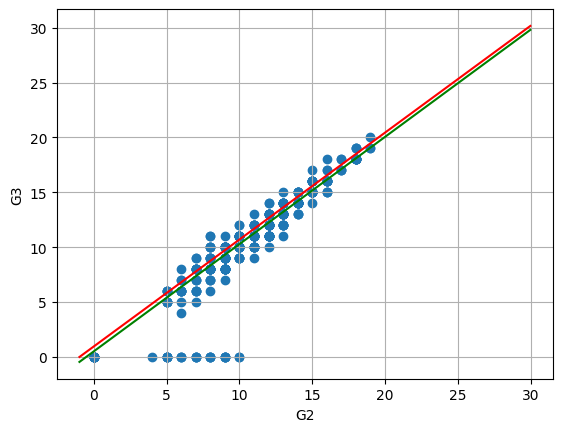

In [ ]:
numm=-1
# Here is the data.
# How do I enforce a square grid in matplotlib? reference: https://stackoverflow.com/questions/50158333/how-do-i-enforce-a-square-grid-in-matplotlib
plt.grid()

# Add labels to the x- and y-axis.
plt.xlabel(ColX)
plt.ylabel(ColY)

# Data is plotted.
plt.scatter(df[ColX],df[ColY])

# Here is the hypothesis function a.k.a. prediction function.
xpoints = np.arange(-1,30,0.01)
#ypoints = xpoints*coeffh[2]+h_i[1]

#for i in coeffh:
plt.plot(xpoints, xpoints*Hmf[1][ColXi]+Hmf[0],color='red')
plt.plot(xpoints, xpoints*skRLmf.coef_[0][ColXi]+skRLmf.intercept_,color='green')

'''
plt.plot(xpoints, xpoints*H1f[1]+H1f[0],color='black')
plt.plot(xpoints, xpoints*skRL.coef_[0][ColXi]+skRL.intercept_,color='green')
plt.plot(xpoints, xpoints*npRL[0]+npRL[1],color='black')
'''

plt.show()

**[3.2] $J_1(h^{\{0\}}_m,\vec{h_n})=\frac{1}{2m}(X_{m\times n}\cdot\vec{h_n}+h^{\{0\}}_m-\vec{y_m})^2$**

In [49]:
def LineR_Evaluation(TestX,TestY,Coef_Vect,Inte_Cons):
  m=TestX.shape[0]
  Jh=np.dot(TestX,np.array(list(Coef_Vect))).reshape(-1)+np.full((m),Inte_Cons).reshape(-1)-TestY.values.reshape(-1)
  return np.dot(Jh,Jh)/(2*m)
print(LineR_Evaluation(TeX,TeY,Hmf[1],Hmf[0]))
print(LineR_Evaluation(TeX,TeY,skRLmf.coef_.tolist()[0],skRLmf.intercept_))

1.292654481458413
1.3097516267359377


**[3.3] $R^2$**

In [50]:
def FindR2(TestX,TestY,Coef_Vect,Inte_Cons):
  m=TestX.shape[0]
  TestY=TestY.values.reshape(-1)
  dH=np.dot(TestX,np.array(list(Coef_Vect)))+np.full((m),Inte_Cons)-TestY
  dY=(1/m)*np.dot(TestY,np.full((m),1))*np.full((m),1)-TestY
  #dY=TestY.mean()-TestY
  
  #print('Hello')
  #print(np.dot(dH,dH))
  #print(np.dot(dY,dY))
  
  return np.dot(dH,dH)/np.dot(dY,dY)

R2_0=FindR2(TeX,TeY,Hmf[1],Hmf[0])
R2_1=FindR2(TeX,TeY,skRLmf.coef_.tolist()[0],skRLmf.intercept_)

print("R2_0 = "+str(1-R2_0))
print("R2_1 = "+str(1-R2_1))

R2_0 = 0.8148032952379198
R2_1 = 0.8123538124011267


In [53]:
from sklearn.metrics import r2_score

mm=TeX.shape[0]

R2_0=r2_score(TeY,np.dot(TeX,Hmf[1])+np.full((mm),Hmf[0]))
R2_1=r2_score(TeY,np.dot(TeX,skRLmf.coef_.tolist()[0])+np.full((mm),skRLmf.intercept_))
#print('R222='+str(skRLmf.coef_.tolist()[0])+np.full((mm),skRLmf.intercept_))
print('R2_0 = '+str(R2_0))
print('R2_1 = '+str(R2_1))
#print("R^2 = "+str(R2_0))
#print("R^2 = "+str(R2_1))

R2_0 = 0.8148032952379198
R2_1 = 0.8123538124011267


#[Unfinished]: Linear Regression with multiple degrees

# [Unfinished]: Optimize linear regression without gradient descent
* normal equation (https://machinelearningmastery.com/solve-linear-regression-using-linear-algebra/)
* matrix multiplication.
(https://stackoverflow.com/questions/34746724/fit-data-to-curve-using-polyfit-with-multiple-variables-in-python-using-numpy-po)

#[Unfinished]: Evaluate the accuracy of linear regression without r-square